# Imports

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# configurações globais
sns.set_theme()                                                   # gráfico
plt.rcParams['figure.figsize'] = [20, 10]                         # gráfico
pd.set_option('display.float_format', lambda x: '%.5f' % x)       # notação científica

# 1. Descrição dos Dados

In [2]:
df_raw = pd.read_csv('datasets/df_ready.csv')

In [3]:
df_raw.head()

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725
1,5,2017-09-08 05:00:00,2017/09/08,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/08,Friday,9,September,8,36,0.001525,3.880725
2,6,2017-10-24 04:00:00,2017/10/24,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/10/24,Tuesday,10,October,24,43,-0.760844,3.880725
3,7,2017-08-15 15:00:00,2017/08/15,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/08/15,Tuesday,8,August,15,33,1.523722,3.880725
4,8,2017-09-14 21:00:00,2017/09/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,New,...,https://www.walmart.com/ip/Boytone-BT-210F-Blu...,14 pounds,2017/09/14,Thursday,9,September,14,37,0.253107,3.880725


## 1.1 Dimensão dos Dados

In [6]:
print(f'Linhas: {df_raw.shape[0]}')
print(f'Colunas: {df_raw.shape[1]}')

Linhas: 23151
Colunas: 32


## 1.2 Dimensões

In [7]:
df_raw.columns

Index(['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std'],
      dtype='object')

In [8]:
# Colunas que não vamos utilizar
cols={'Unnamed: 0', 
         'Date_imp',
         'Cluster',
         'condition',
         'sourceURLs',
         'Date_imp_d.1', 
         'Zscore_1',
         'price_std',
         'imageURLs',
         'shipping',
         'weight',
         'currency'}

df1  = df_raw.drop(columns=cols)

## 1.3 Renomeação das Colunas

In [10]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']

df1.columns = cols_name

## 1.4 Tipos dos Dados

In [12]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.5 Check NA's

In [13]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.6 Mudança de Tipos

In [15]:
df1['date_imp'] = pd.to_datetime(df1['date_imp'])

## 1.7 Estatítisca Descritiva

In [16]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

### 1.7.1 Variáveis Numéricas

In [17]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2 Análise Descritiva do Dados

In [18]:
df2 = df1.copy()

Algumas perguntas para análise:
- Qual o merchant mais vendeu?

- Qual é a categoria mais vendida?

- Qual é a marca mais vendida?

- Quais os dias que mais vendem?

- Quais os meses que mais vendem?

- Quais as semanas que mais vendem?

In [25]:
df2.head(1)

,date_imp,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,imp_count,brand,p_description,dateadded,dateseen,dateupdated,manufacturer,day_n,month,month_n,day,week_number
0,2017-12-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50


## 2.1 Qual é o merchant que mais vendeu?

<AxesSubplot:xlabel='merchant', ylabel='date_imp'>

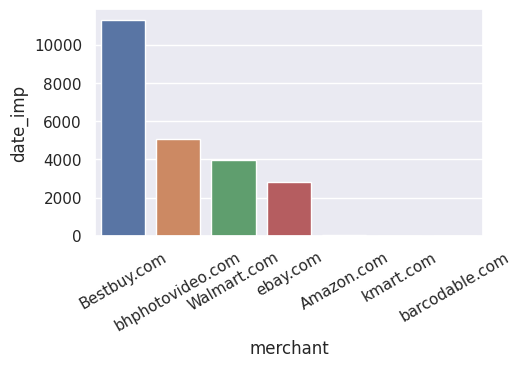

In [38]:
aux1 = df2[['date_imp', 'merchant']].groupby('merchant').count().reset_index().sort_values('date_imp', ascending=False)

plt.xticks(rotation=30)
sns.barplot(aux1, x='merchant', y='date_imp')

In [40]:
# filtragem do df para os merchants que mais venderam
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

## 2.2 Qual é a categoria mais vendida?

### 2.2.1 No geral (Top 10)

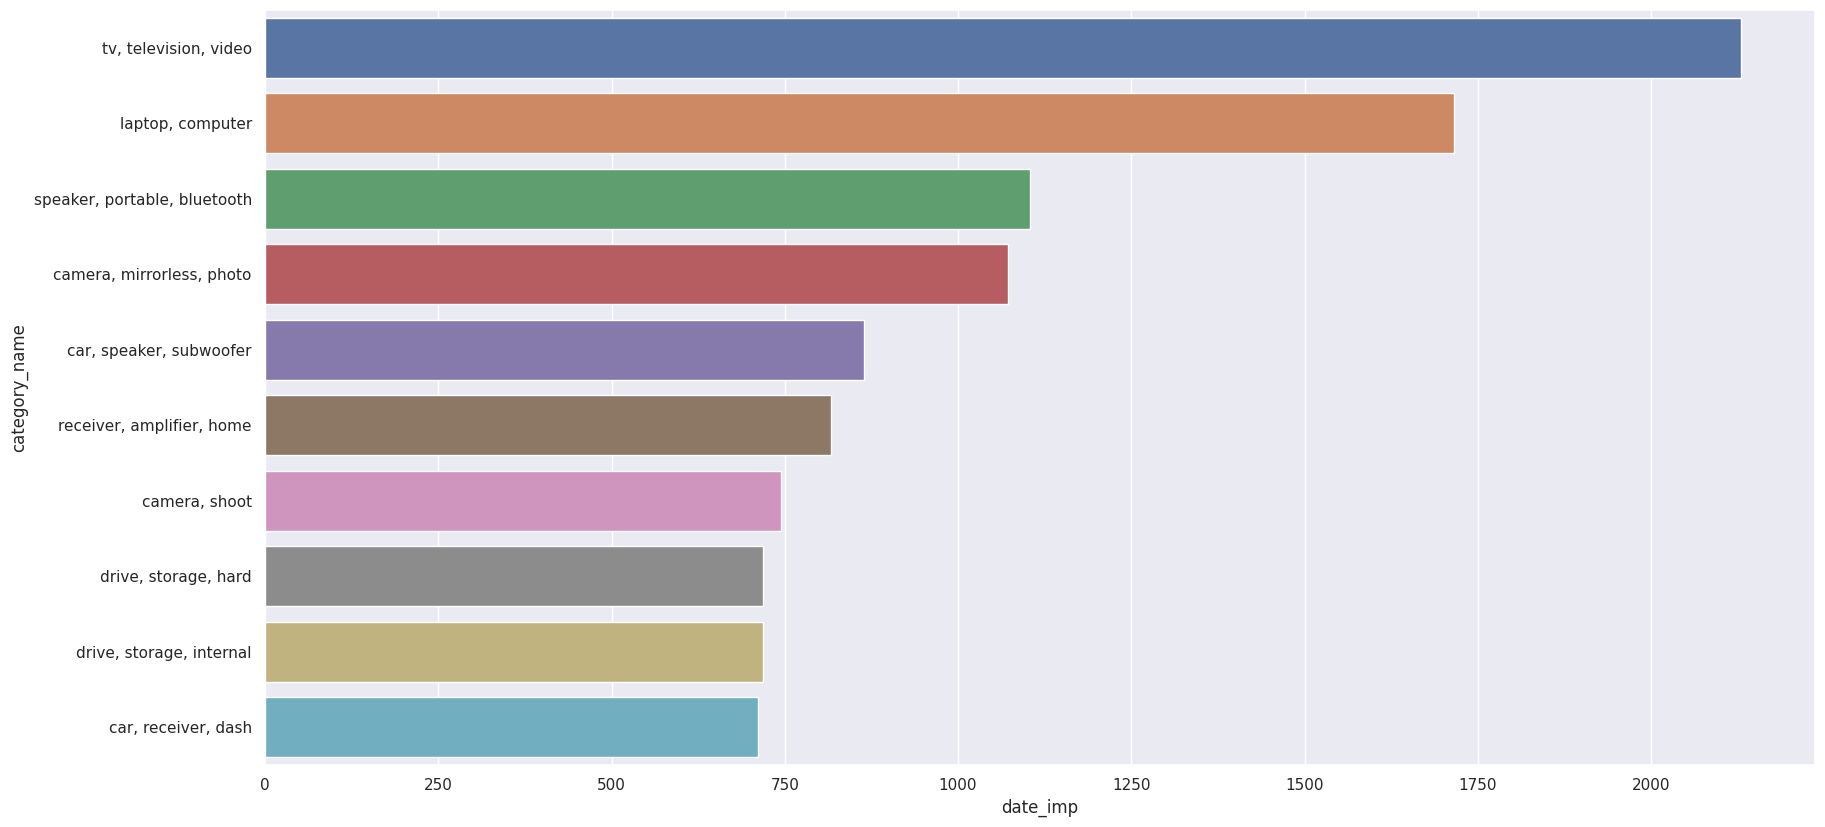

In [59]:
aux1 = df2[['category_name', 'date_imp']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False).head(10)

# plt.xticks(rotation=90)

sns.barplot(aux1, y='category_name', x='date_imp');

### 2.2.2 Por Mechant (Top 10)

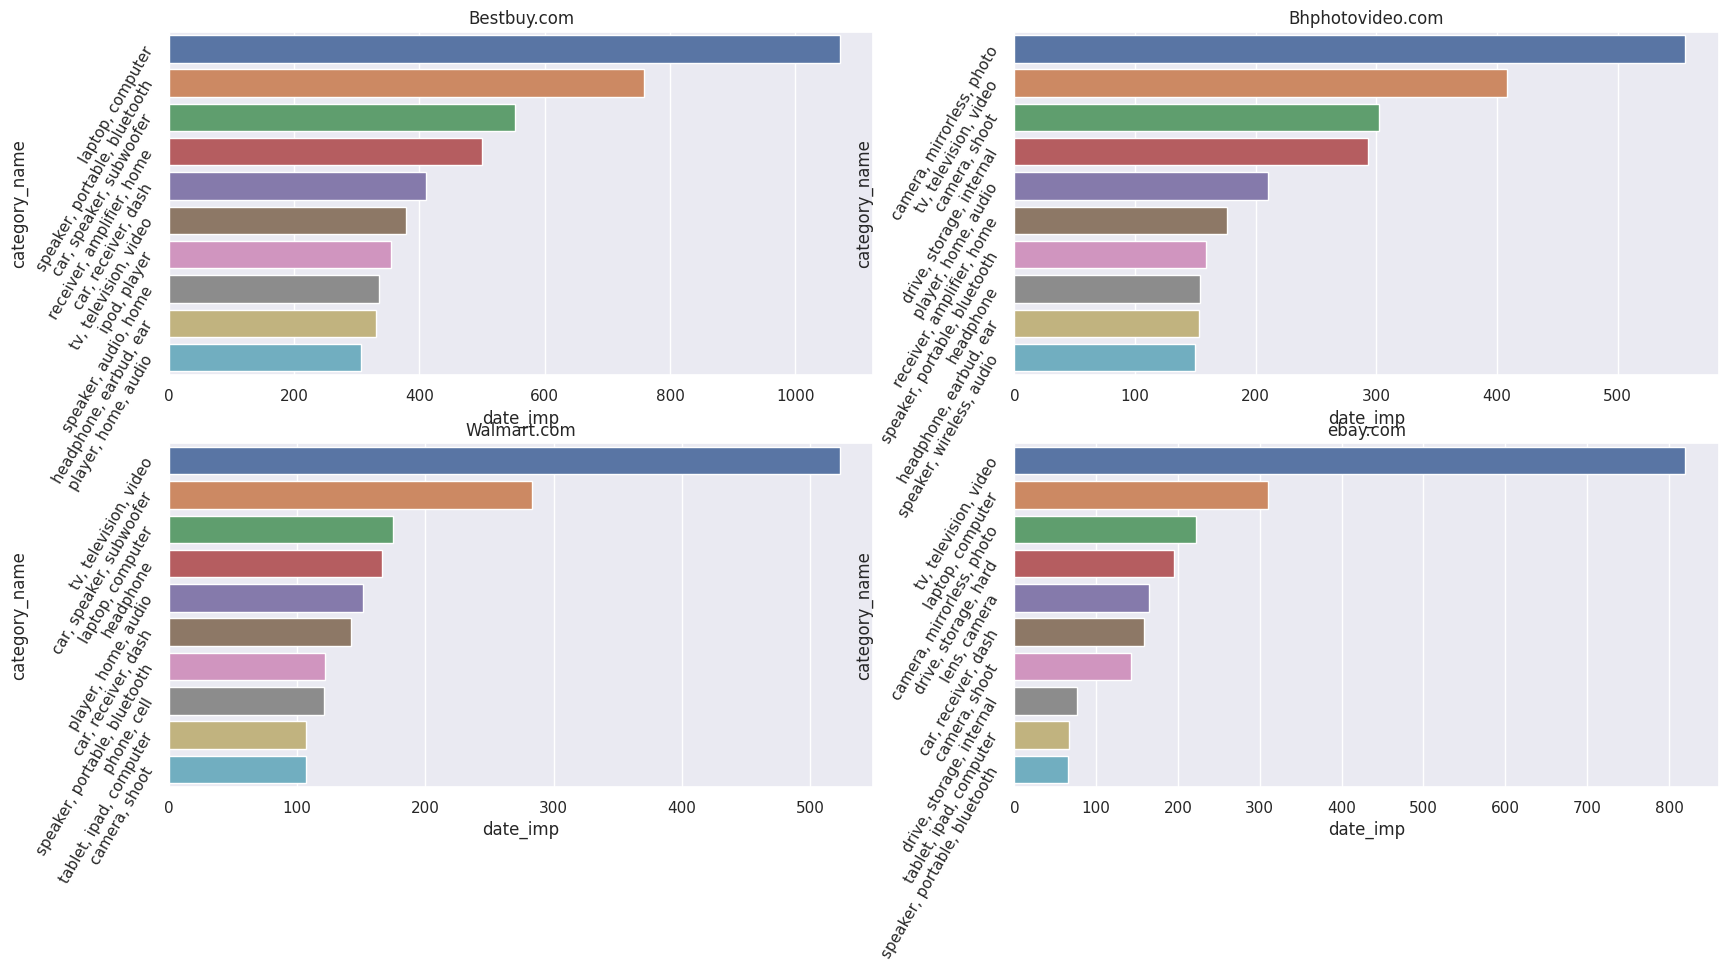

In [64]:
aux1 = df_best[['category_name', 'date_imp']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 1)
plt.title('Bestbuy.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='category_name', x='date_imp');

aux1 = df_bhp[['category_name', 'date_imp']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 2)
plt.title('Bhphotovideo.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='category_name', x='date_imp');

aux1 = df_walmart[['category_name', 'date_imp']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 3)
plt.title('Walmart.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='category_name', x='date_imp');

aux1 = df_ebay[['category_name', 'date_imp']].groupby('category_name').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 4)
plt.title('ebay.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='category_name', x='date_imp');

## 2.3  Qual é a marca mais vendida?

### 2.3.1 No geral (Top 10)

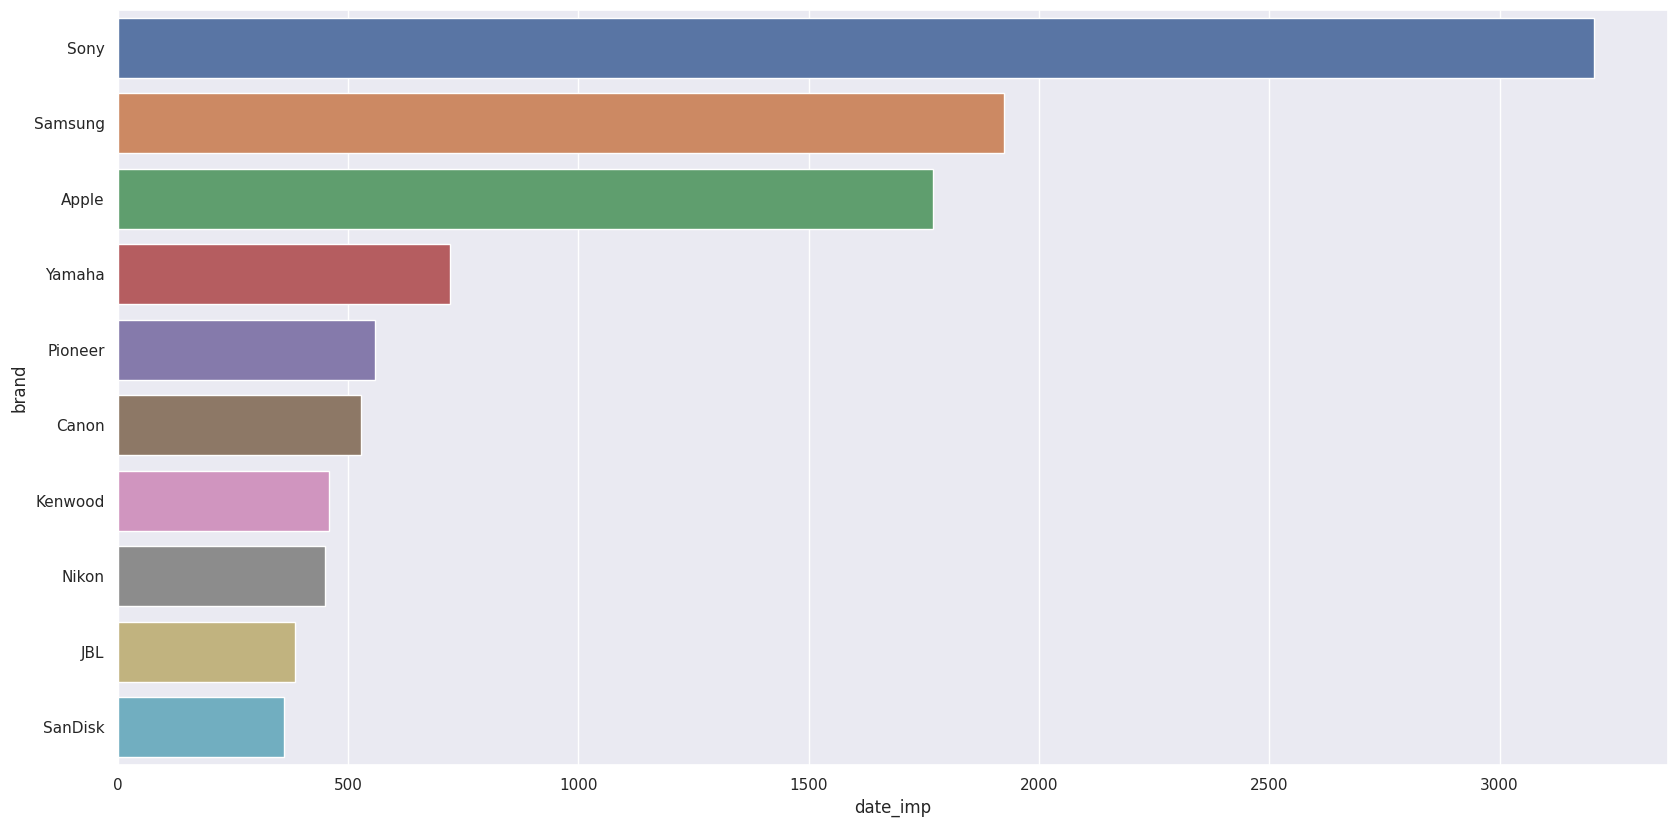

In [60]:
aux1 = df2[['brand', 'date_imp']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False).head(10)

# plt.xticks(rotation=90)

sns.barplot(aux1, y='brand', x='date_imp');

### 2.3.2 Por Merchant (Top 10)

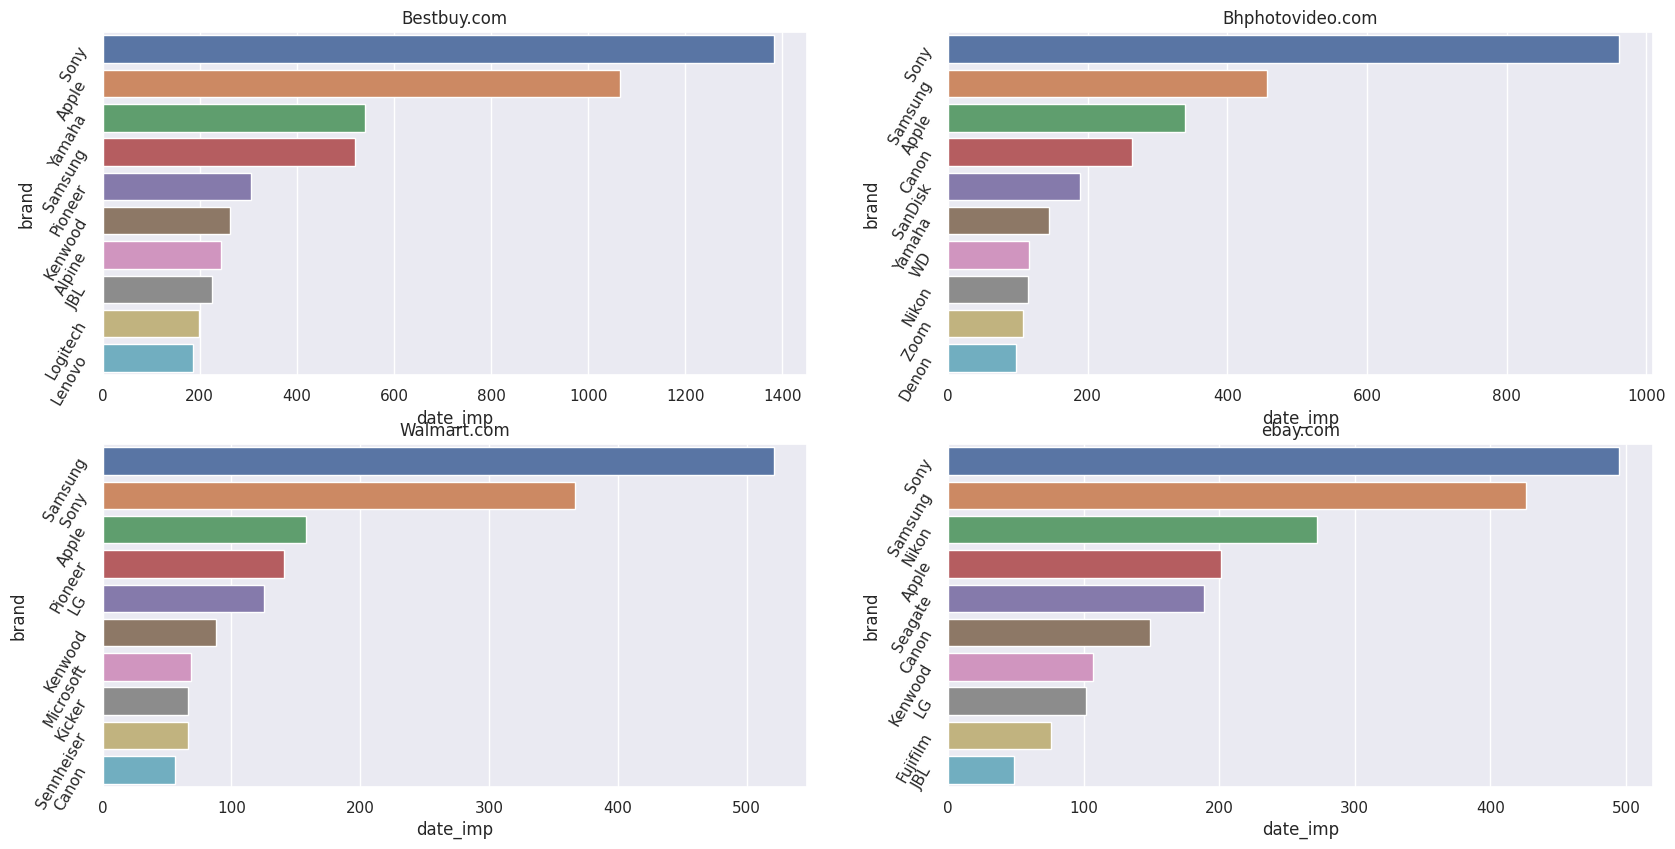

In [63]:
aux1 = df_best[['brand', 'date_imp']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 1)
plt.title('Bestbuy.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='brand', x='date_imp');

aux1 = df_bhp[['brand', 'date_imp']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 2)
plt.title('Bhphotovideo.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='brand', x='date_imp');

aux1 = df_walmart[['brand', 'date_imp']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 3)
plt.title('Walmart.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='brand', x='date_imp');

aux1 = df_ebay[['brand', 'date_imp']].groupby('brand').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 4)
plt.title('ebay.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='brand', x='date_imp');

##  2.4 Quais os dias que mais vendem?

### 2.4.1 No geral

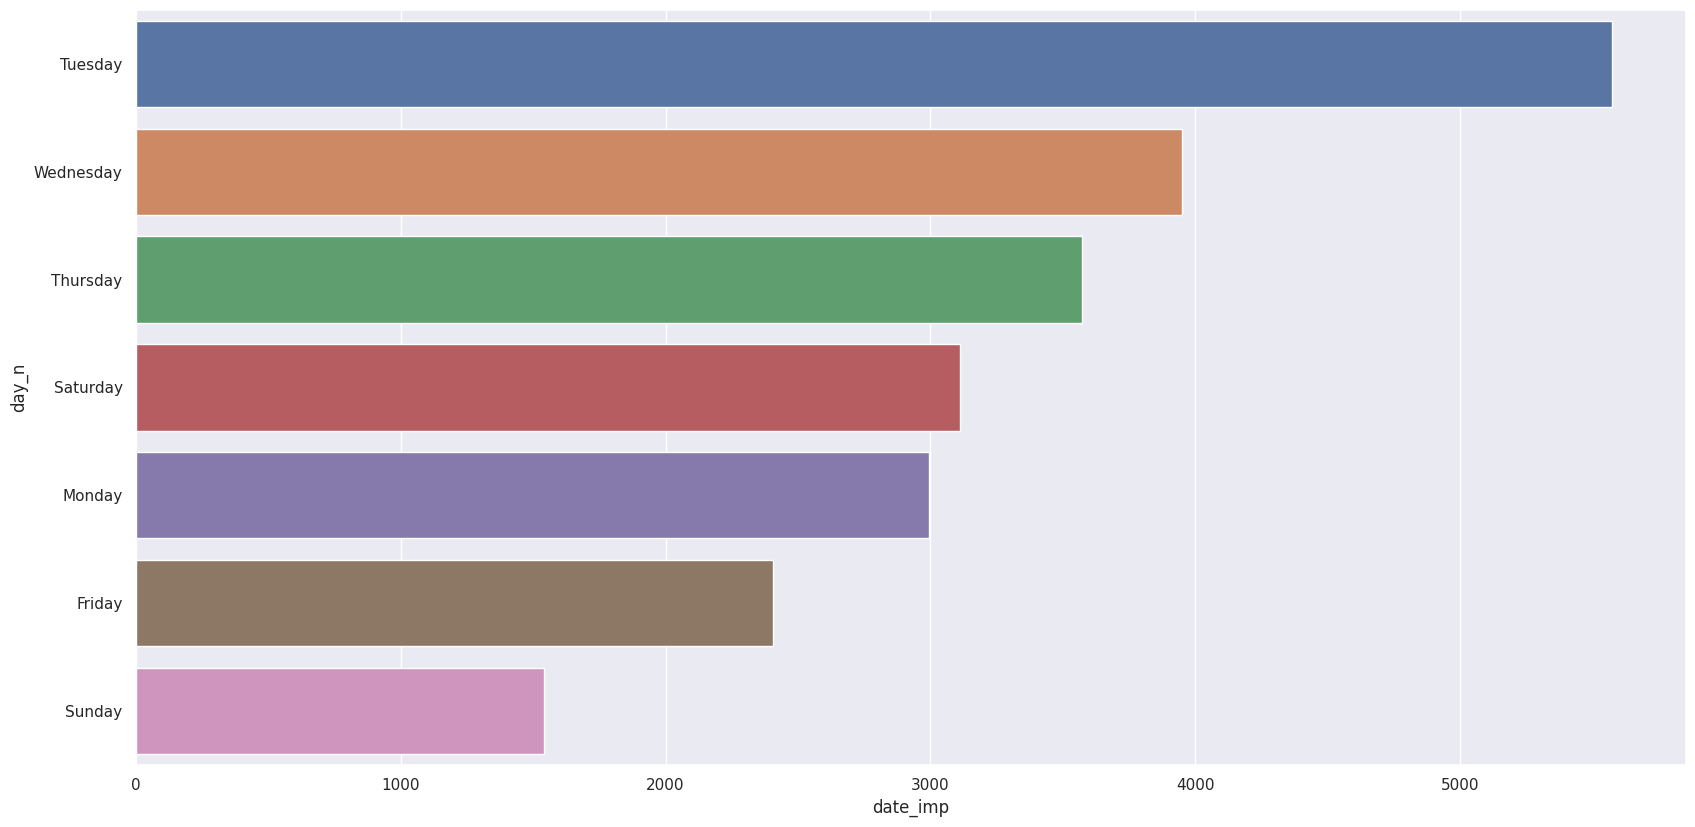

In [65]:
aux1 = df2[['day_n', 'date_imp']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)

# plt.xticks(rotation=90)

sns.barplot(aux1, y='day_n', x='date_imp');

### 2.4.2 Por Merchant

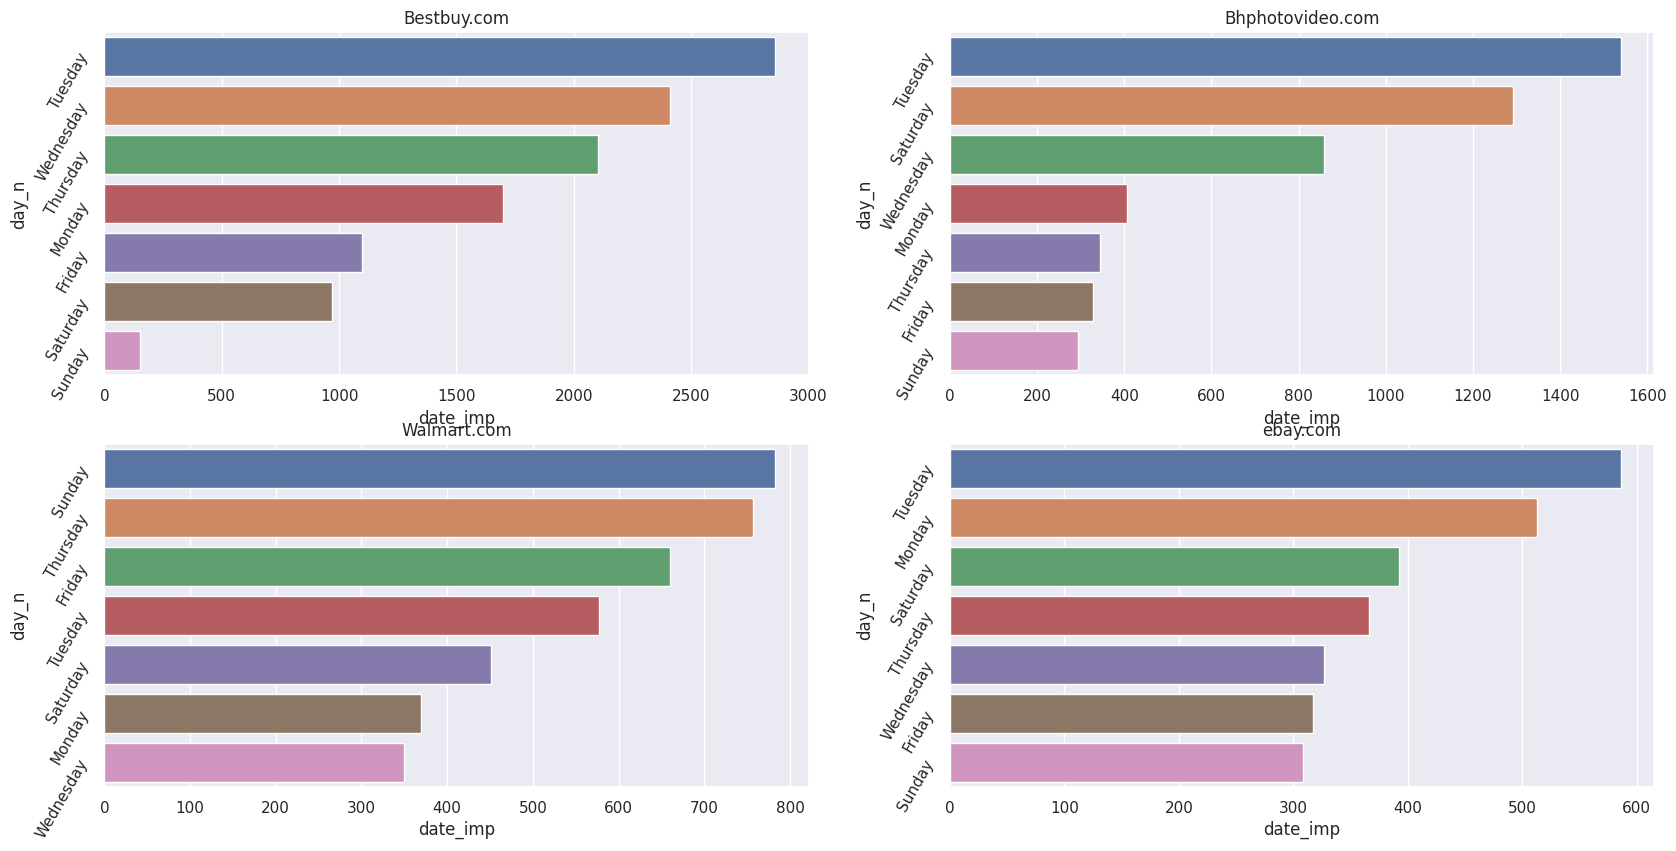

In [66]:
aux1 = df_best[['day_n', 'date_imp']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 1)
plt.title('Bestbuy.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='day_n', x='date_imp');

aux1 = df_bhp[['day_n', 'date_imp']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 2)
plt.title('Bhphotovideo.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='day_n', x='date_imp');

aux1 = df_walmart[['day_n', 'date_imp']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 3)
plt.title('Walmart.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='day_n', x='date_imp');

aux1 = df_ebay[['day_n', 'date_imp']].groupby('day_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 4)
plt.title('ebay.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='day_n', x='date_imp');

## 2.5 Quais os meses que mais vendem?

### 2.5.1 No geral

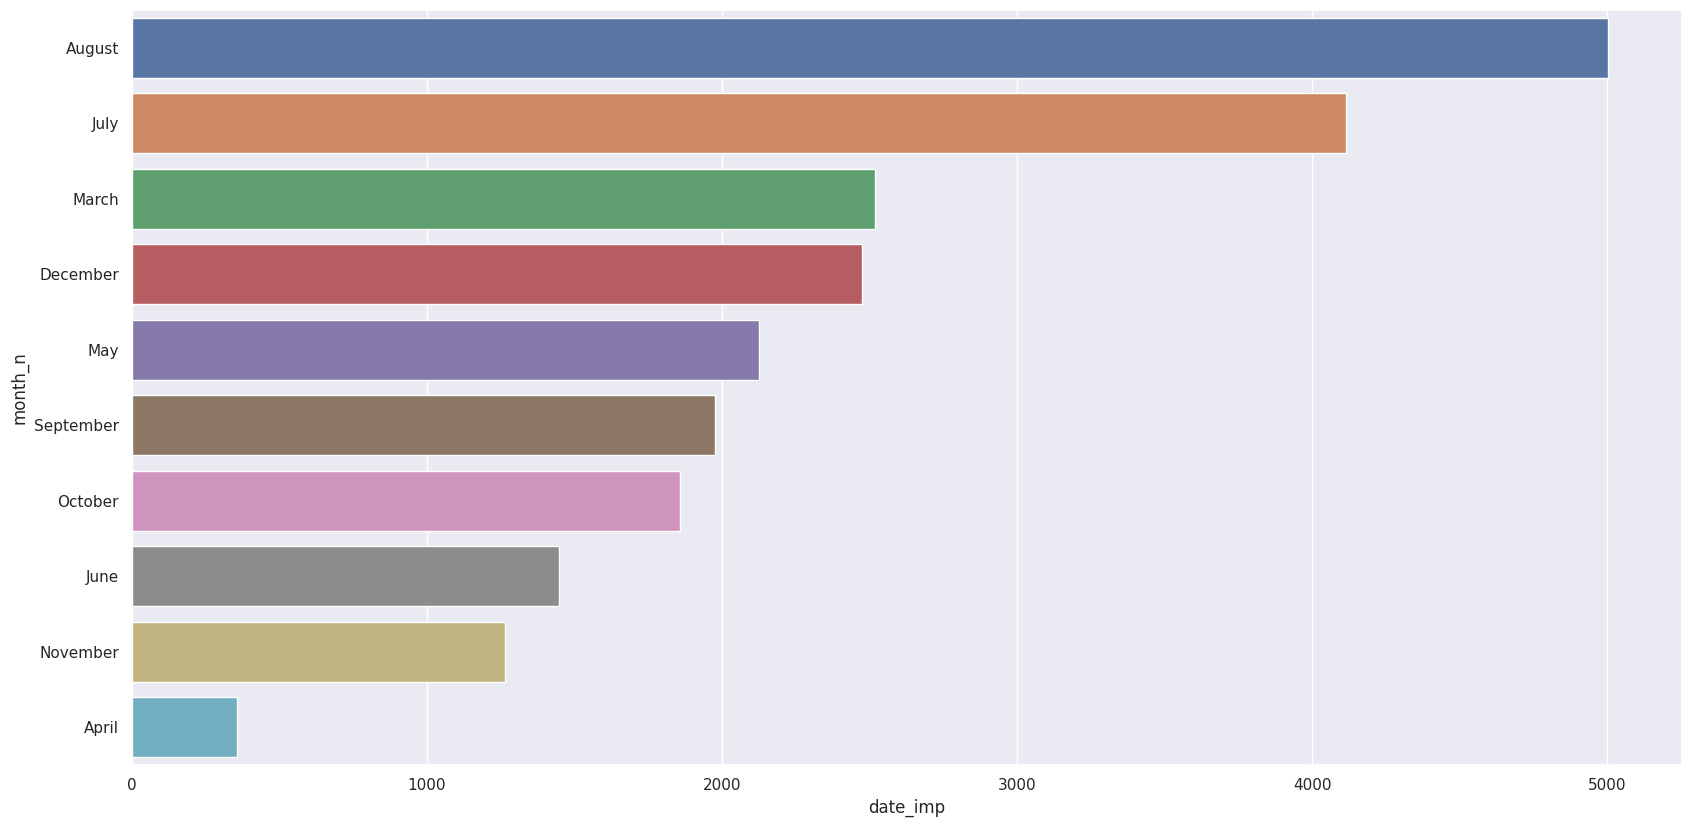

In [67]:
aux1 = df2[['month_n', 'date_imp']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)

# plt.xticks(rotation=90)

sns.barplot(aux1, y='month_n', x='date_imp');

###  2.5.2 Por Merchant

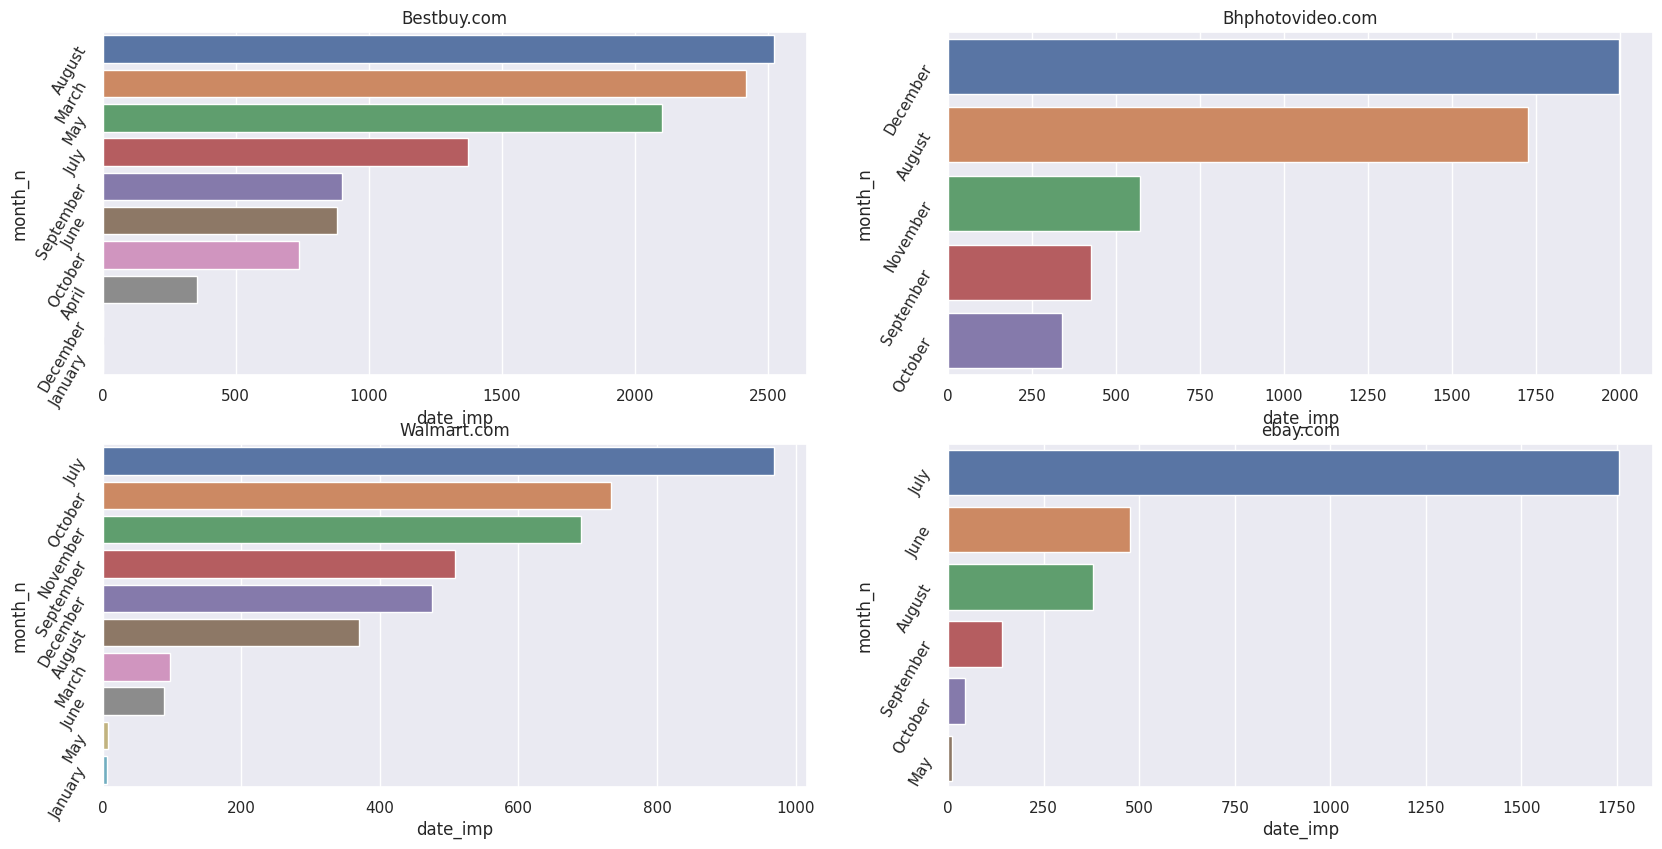

In [71]:
aux1 = df_best[['month_n', 'date_imp']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 1)
plt.title('Bestbuy.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='month_n', x='date_imp');

aux1 = df_bhp[['month_n', 'date_imp']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 2)
plt.title('Bhphotovideo.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='month_n', x='date_imp');

aux1 = df_walmart[['month_n', 'date_imp']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 3)
plt.title('Walmart.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='month_n', x='date_imp');

aux1 = df_ebay[['month_n', 'date_imp']].groupby('month_n').count().reset_index().sort_values('date_imp', ascending=False).head(10)
plt.subplot(2, 2, 4)
plt.title('ebay.com')
plt.yticks(rotation=60)
sns.barplot(aux1, y='month_n', x='date_imp');

## 2.6 Quais as semanas que mais vendem?

### 2.6.1 No geral

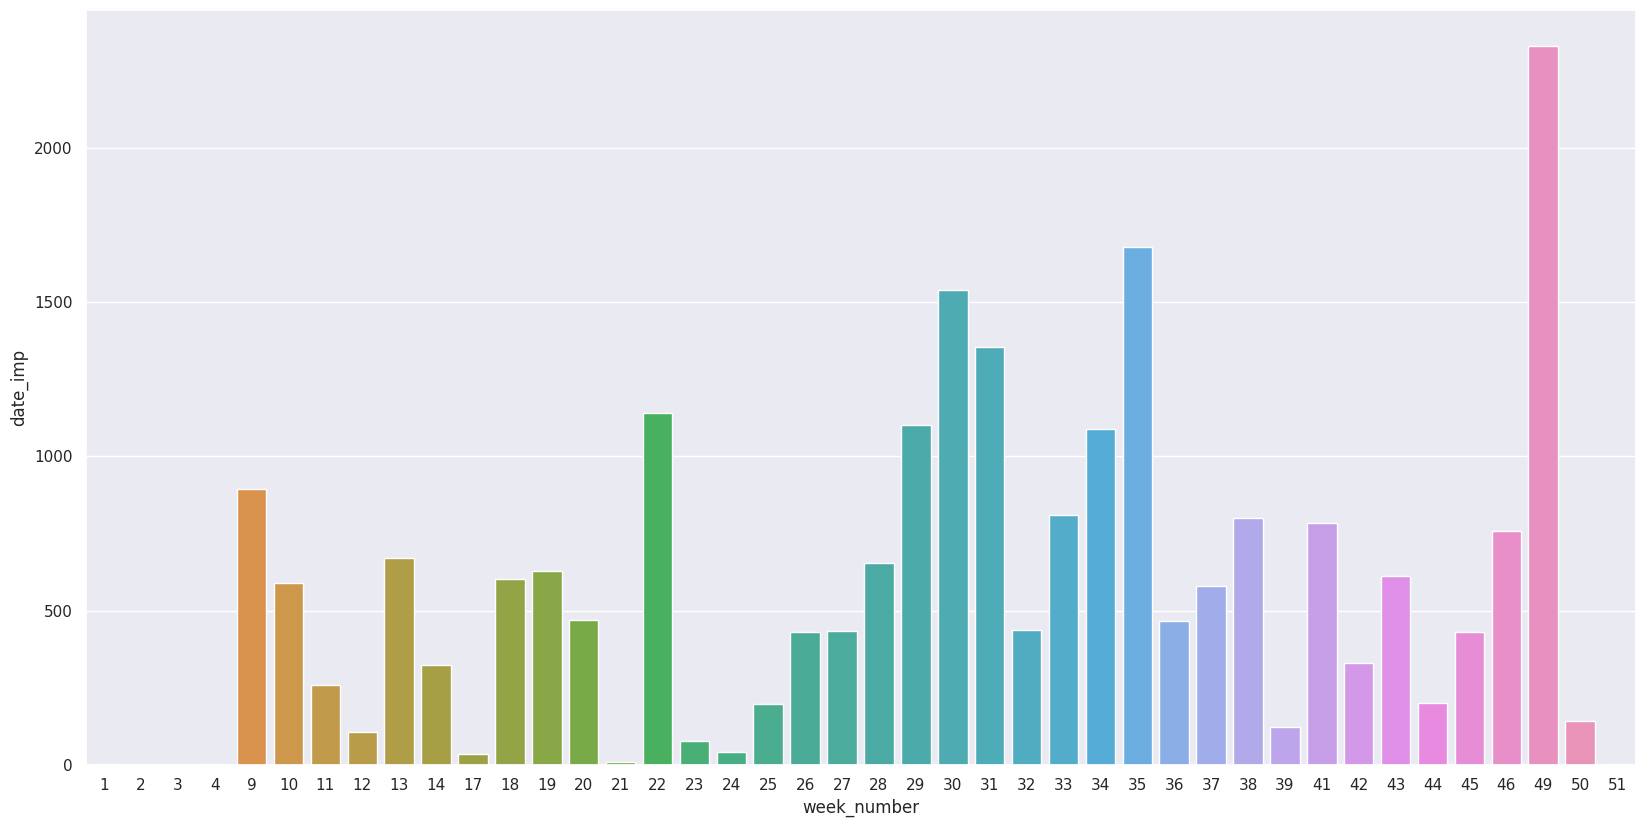

In [74]:
aux1 = df2[['week_number', 'date_imp']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)

# plt.xticks(rotation=90)

sns.barplot(aux1, x='week_number', y='date_imp');

### 2.6.2 Por Merchant

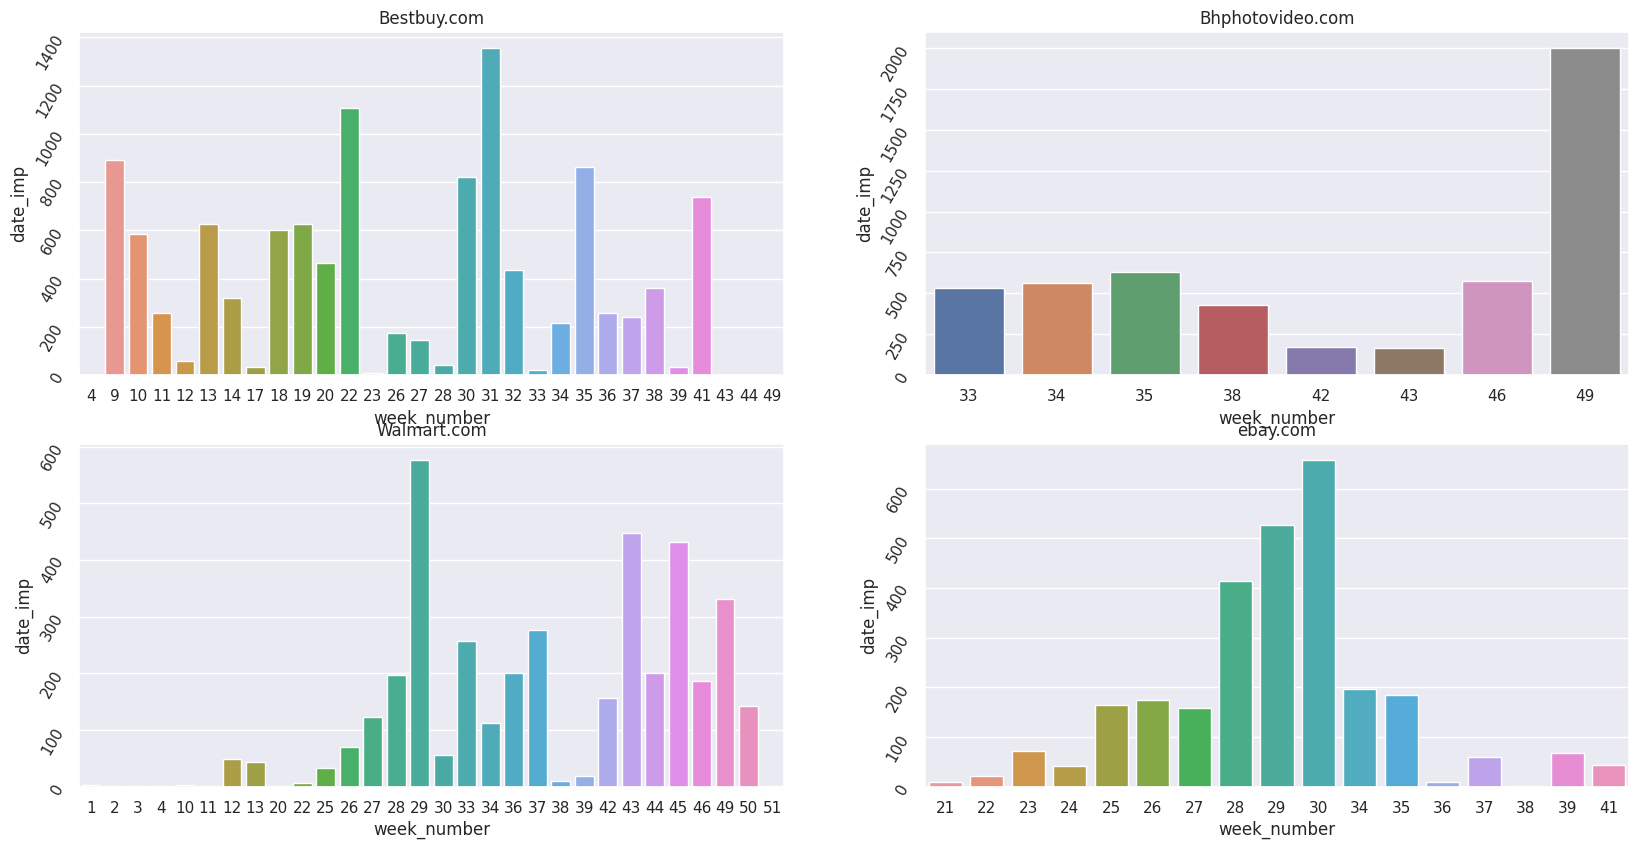

In [77]:
aux1 = df_best[['week_number', 'date_imp']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.subplot(2, 2, 1)
plt.title('Bestbuy.com')
plt.yticks(rotation=60)
sns.barplot(aux1, x='week_number', y='date_imp');

aux1 = df_bhp[['week_number', 'date_imp']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.subplot(2, 2, 2)
plt.title('Bhphotovideo.com')
plt.yticks(rotation=60)
sns.barplot(aux1, x='week_number', y='date_imp');

aux1 = df_walmart[['week_number', 'date_imp']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.subplot(2, 2, 3)
plt.title('Walmart.com')
plt.yticks(rotation=60)
sns.barplot(aux1, x='week_number', y='date_imp');

aux1 = df_ebay[['week_number', 'date_imp']].groupby('week_number').count().reset_index().sort_values('date_imp', ascending=False)
plt.subplot(2, 2, 4)
plt.title('ebay.com')
plt.yticks(rotation=60)
sns.barplot(aux1, x='week_number', y='date_imp');